In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
df = pd.read_csv('filtered_data_month_1.csv', delimiter=',')
df.head()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,hour_of_day,trip_duration
0,5.30,1,1,23.5,0.5,0.5,4.95,0.0,0.3,29.75,249,263,0,968.0
1,6.77,1,1,25.0,0.5,0.5,2.50,0.0,0.3,28.80,179,238,0,2439.0
2,8.30,1,1,26.0,0.5,0.5,6.80,0.0,0.3,34.10,264,264,1,1880.0
3,9.34,1,1,29.0,0.5,0.5,25.00,0.0,0.3,55.30,79,257,1,89.0
4,10.50,1,1,33.0,0.5,0.5,6.85,0.0,0.3,41.15,170,243,1,1136.0


In [33]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 17536
Number of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_distance        17536 non-null  float64
 1   rate_code            17536 non-null  int64  
 2   payment_type         17536 non-null  int64  
 3   fare_amount          17536 non-null  float64
 4   extra                17536 non-null  float64
 5   mta_tax              17536 non-null  float64
 6   tip_amount           17536 non-null  float64
 7   tolls_amount         17536 non-null  float64
 8   imp_surcharge        17536 non-null  float64
 9   total_amount         17536 non-null  float64
 10  pickup_location_id   17536 non-null  int64  
 11  dropoff_location_id  17536 non-null  int64  
 12  hour_of_day          17536 non-null  int64  
 13  trip_duration        17536 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.9 

In [34]:
X_df=df.drop('total_amount',axis=1)
Y_df=df['total_amount']

In [35]:
df.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,hour_of_day,trip_duration
count,17536.000000,17536.000000,17536.000000,17536.000000,17536.000000,17536.000000,17536.000000,17536.000000,17536.000000,17536.00000,17536.000000,17536.000000,17536.000000,17536.000000
mean,10.020979,1.193089,1.152714,32.021928,0.236103,0.483719,5.828719,2.080054,0.299983,40.96698,149.205520,143.523266,10.808793,2217.138686
std,5.041193,0.655750,0.359722,15.404997,0.254926,0.088746,4.695719,3.456673,0.002265,19.65298,59.836397,79.738908,7.419900,4921.796085
min,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.30000,1.000000,1.000000,0.000000,1.000000
25%,7.100000,1.000000,1.000000,24.000000,0.000000,0.500000,3.450000,0.000000,0.300000,29.80000,132.000000,79.000000,3.000000,1397.750000
50%,9.190000,1.000000,1.000000,28.500000,0.000000,0.500000,5.910000,0.000000,0.300000,37.80000,138.000000,138.000000,12.000000,1833.000000
75%,12.010000,1.000000,1.000000,36.500000,0.500000,0.500000,7.810000,5.760000,0.300000,47.47000,179.000000,228.000000,17.000000,2346.000000
max,55.490000,5.000000,2.000000,217.000000,1.000000,0.500000,140.000000,32.000000,0.300000,274.55000,265.000000,265.000000,23.000000,86330.000000


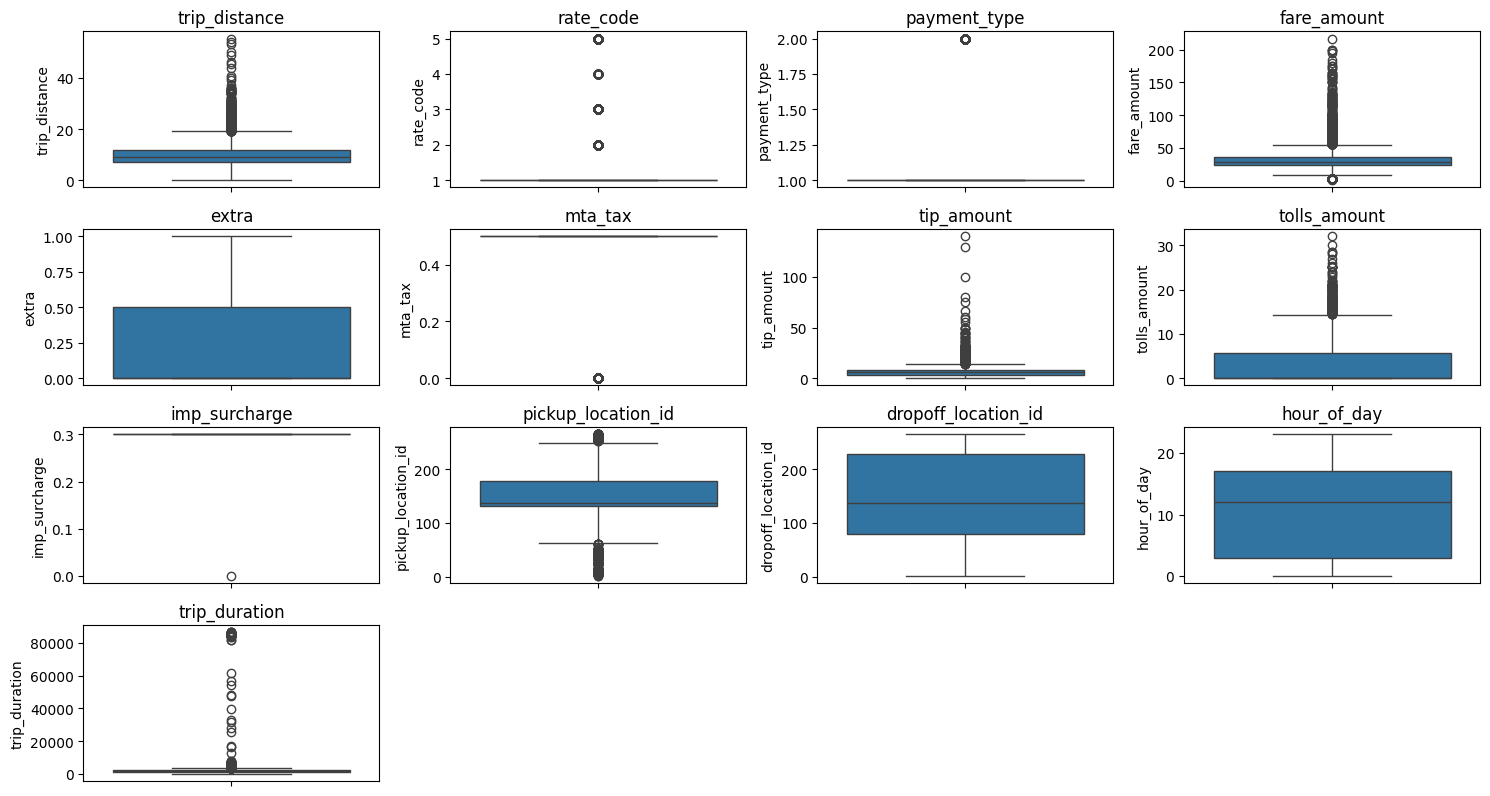

In [36]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, column in enumerate(X_df.columns):
    plt.subplot(5, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=X_df[column])
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<Axes: >

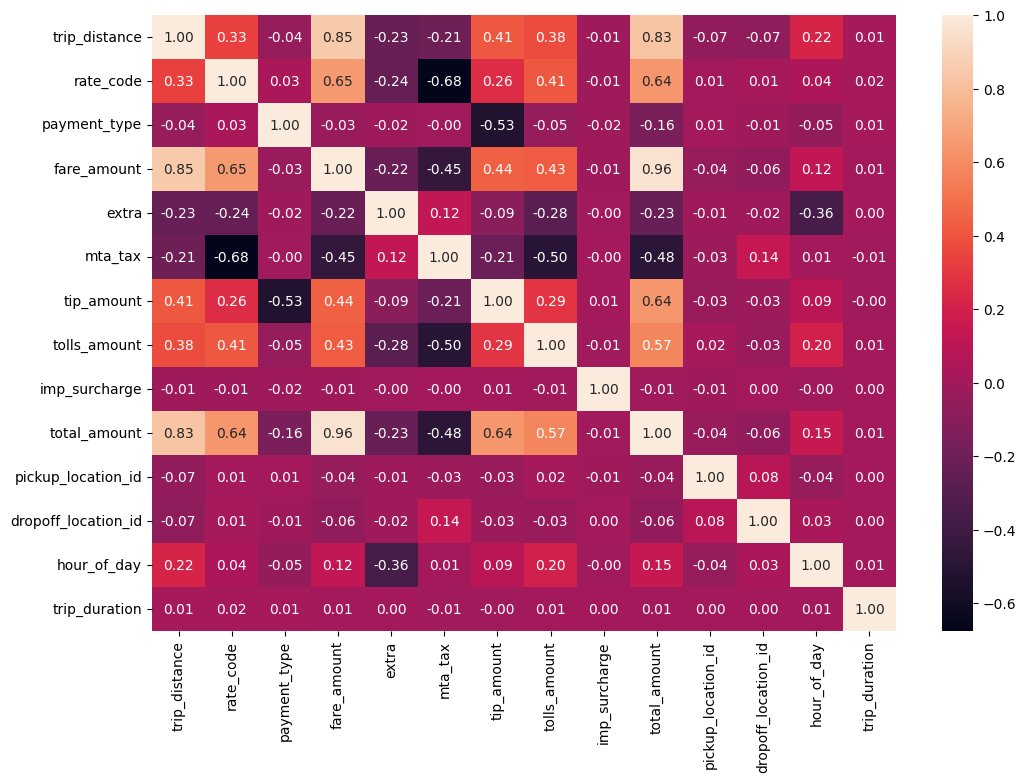

In [37]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f")

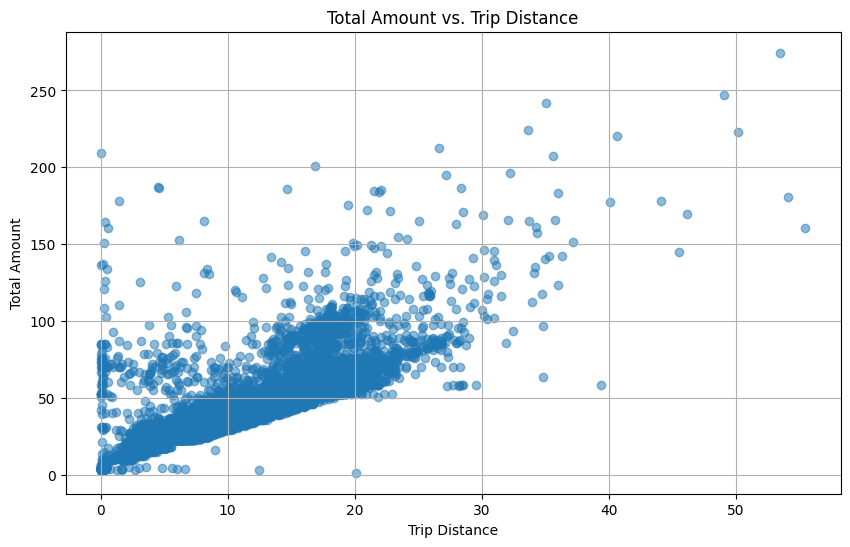

In [38]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['total_amount'], alpha=0.5)
plt.title('Total Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [39]:
# Prepare the features (X) and target (y)
X = df.drop('total_amount', axis=1)  # Drop target columns
y = df['total_amount']
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Apply Standardization to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy (R² score) and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
df_comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Print the DataFrame
print(df_comparison)

R² Score: 0.9999371147721693
Mean Squared Error: 0.02468030028495513
      Actual  Predicted
0      32.80  32.787685
1      37.85  37.886225
2      39.10  39.117526
3      42.07  42.083724
4      30.30  30.337533
...      ...        ...
3503   24.30  24.303963
3504   27.80  27.792096
3505   85.85  85.859629
3506   38.74  38.774051
3507   30.30  30.337898

[3508 rows x 2 columns]


C:\Users\keert\AppData\Local\Temp\ipykernel_29112\1378956323.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


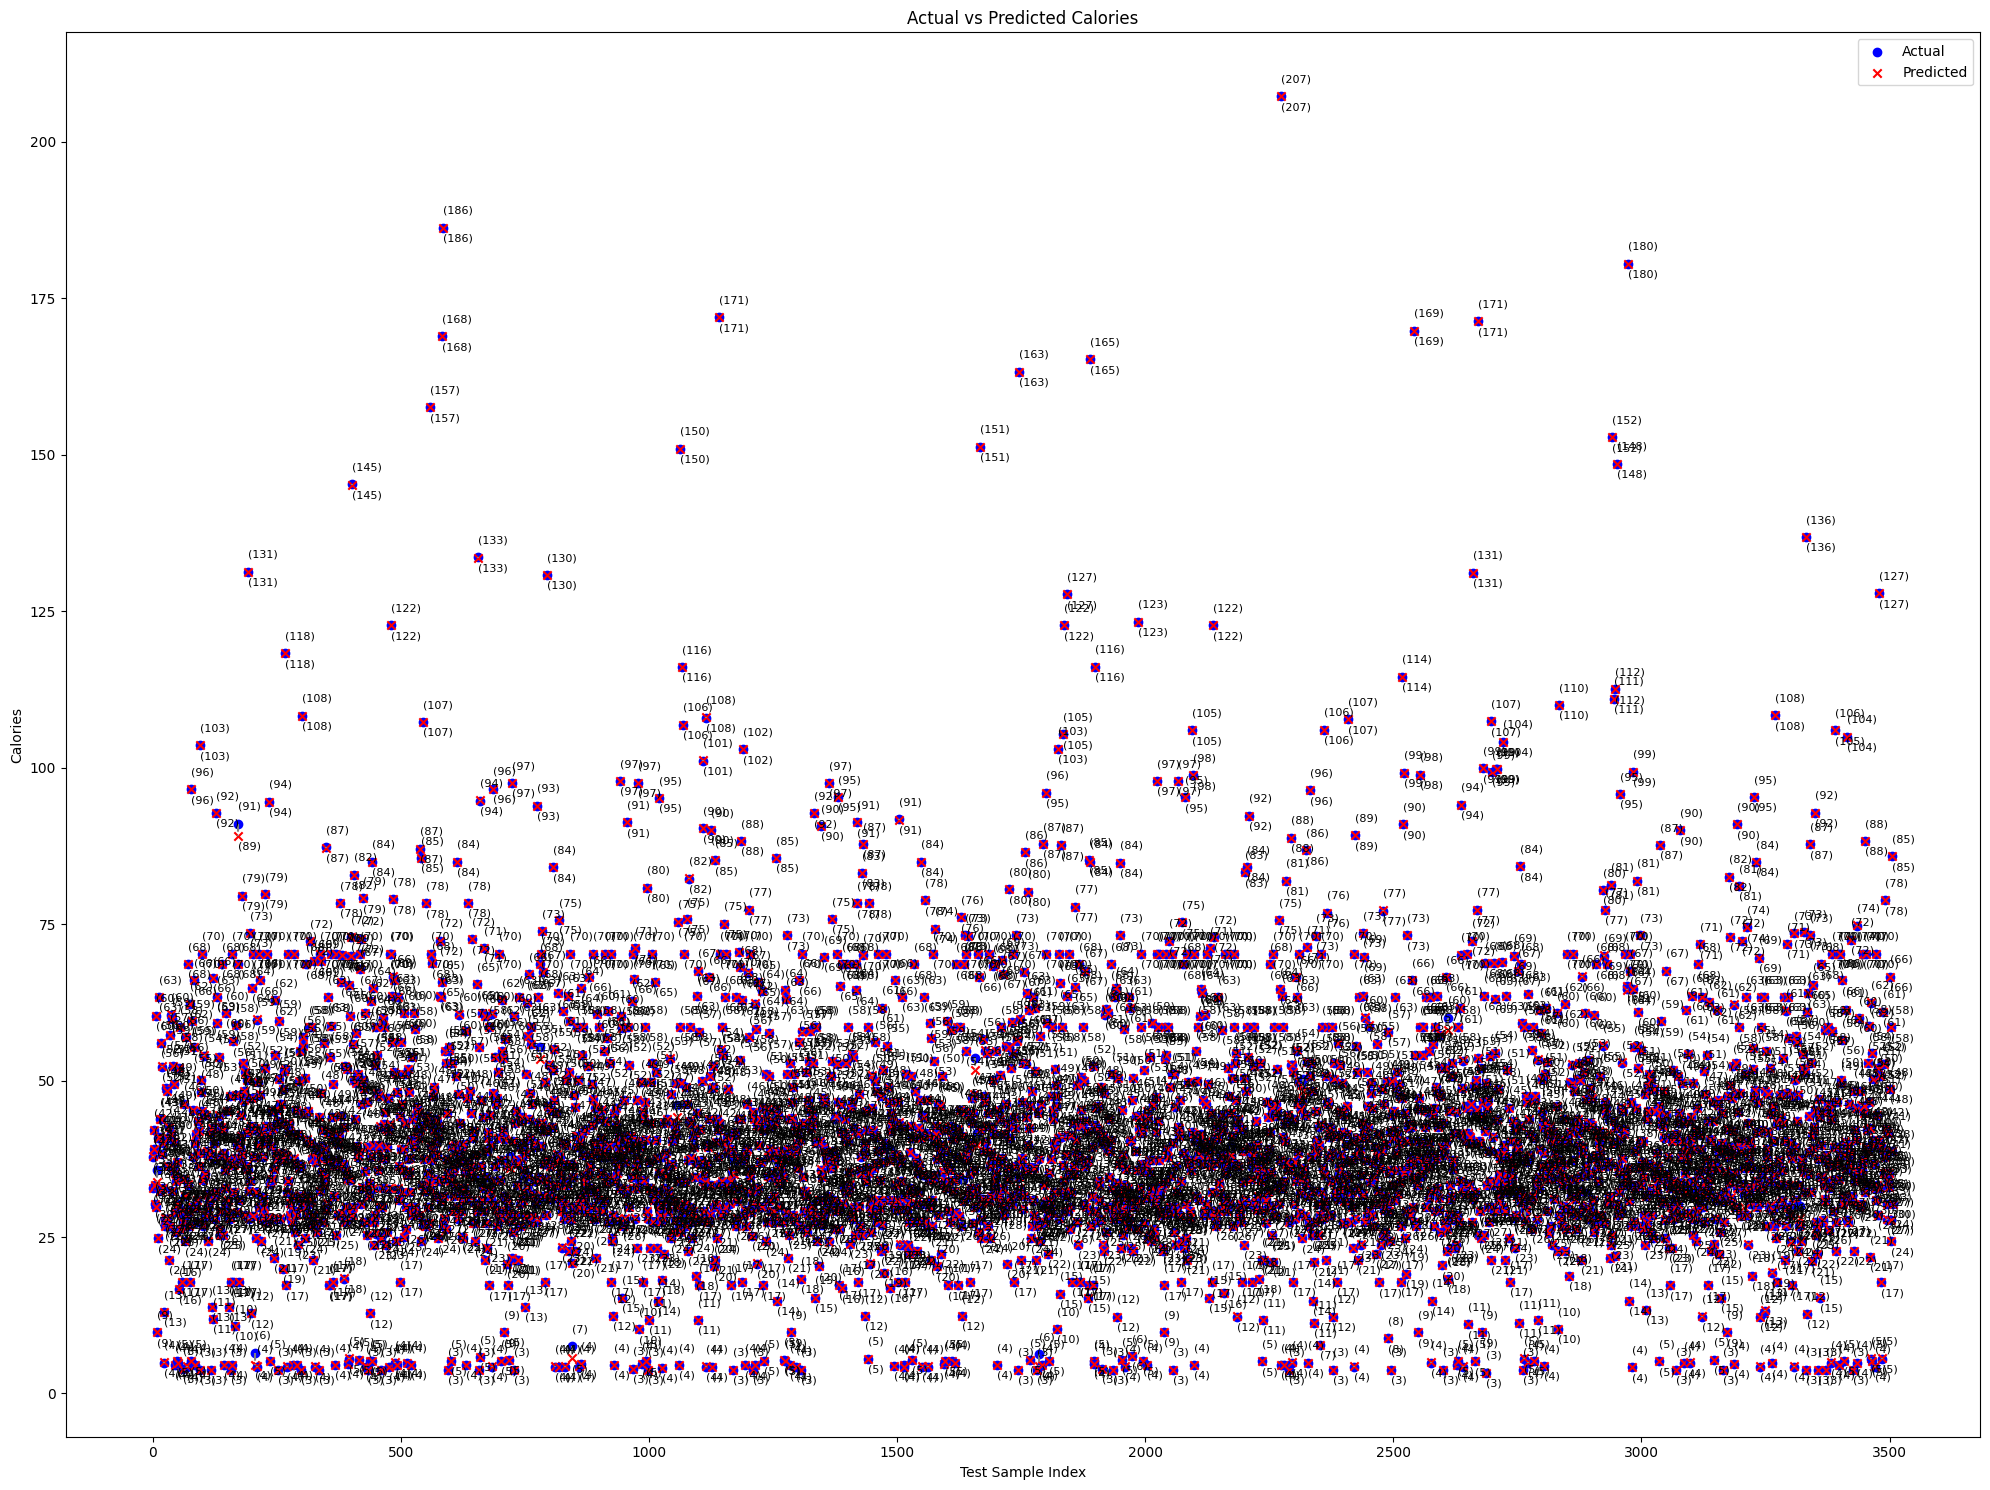

In [43]:
plt.figure(figsize=(20, 15))

for i, (actual, predicted) in enumerate(zip(y_test.values, y_pred)):
    plt.scatter(i, actual, color='b', marker='o', label='Actual' if i == 0 else '')
    plt.scatter(i, predicted, color='r', marker='x', label='Predicted' if i == 0 else '')
    plt.plot([i, i], [actual, predicted], linestyle='--', color='gray')  # Add dashed line

    # Annotate data points with values
    plt.annotate(f"({int(actual)})", xy=(i, actual), textcoords="offset points", xytext=(0, 10), fontsize=8)
    plt.annotate(f"({int(predicted)})", xy=(i, predicted), textcoords="offset points", xytext=(0, -10), fontsize=8)

plt.title('Actual vs Predicted Calories')
plt.xlabel('Test Sample Index')
plt.ylabel('Calories')
plt.legend()
plt.tight_layout()
plt.show()

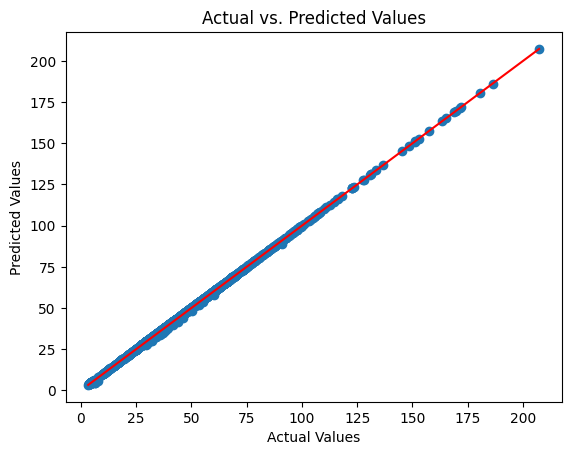

In [44]:
import matplotlib.pyplot as plt

# Assuming you have your actual values in y_test and predicted values in y_pred

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Add a 45-degree line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()

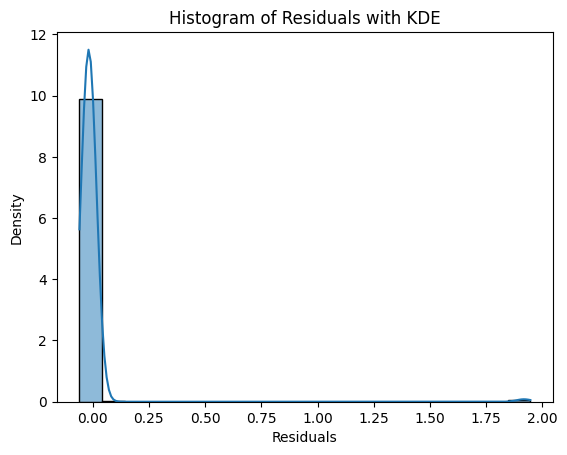

In [45]:
residuals = y_test - y_pred

# Create the plot
sns.histplot(residuals, kde=True, stat='density', bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with KDE")
plt.show()